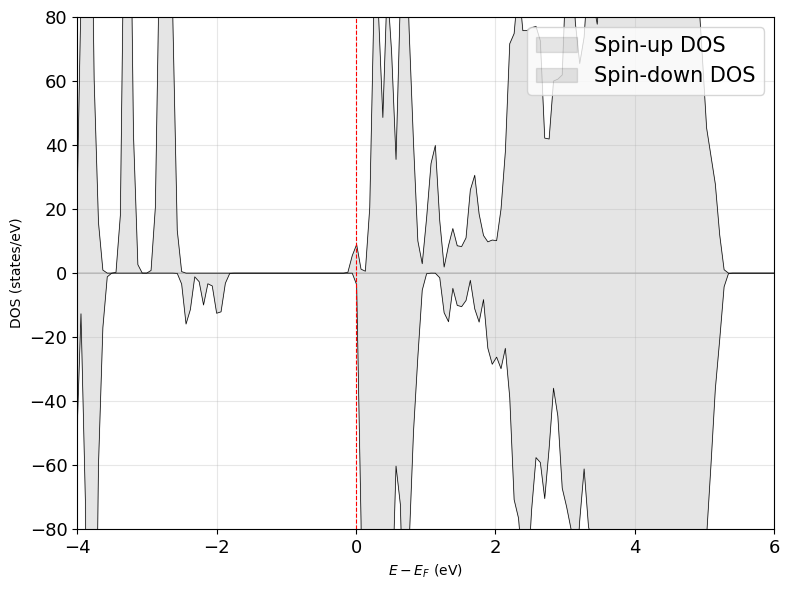

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def read_doscar(filename):
    """
    Read DOSCAR file and extract energy, total DOS, and partial DOS (if available).
    """
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Skip the header (first 6 lines)
    header = lines[:6]
    num_atoms = int(header[0].split()[0])
    e_fermi = float(header[5].split()[3])  # Fermi energy

    # Extract grid data
    nedos = int(header[5].split()[2])  # Number of DOS points
    dos_data = np.array([list(map(float, line.split())) for line in lines[6:6+nedos]])

    energy = dos_data[:, 0]  # Energy values
    total_dos_up = dos_data[:, 1]  # Total DOS (spin-up)
    total_dos_down = dos_data[:, 2] if dos_data.shape[1] > 2 else None  # Total DOS (spin-down)

    return energy, total_dos_up, total_dos_down, e_fermi

def plot_dos(energy, total_dos_up, total_dos_down, e_fermi):
    """
    Plot DOS for a single DOSCAR file with energy aligned to the Fermi level.
    """
    energy_shifted = energy - e_fermi  # shift energy to 0
    # energy_shifted = energy  # do not shift energy

    plt.figure(figsize=(8, 6))

    # Fill the area under the spin-up DOS curve
    plt.fill_between(energy_shifted, total_dos_up, color='black', alpha=0.1, label='Spin-up DOS')
    if total_dos_down is not None:
        plt.fill_between(energy_shifted, -total_dos_down, color='black', alpha=0.1, label='Spin-down DOS')

    # Plot the outlines of the DOS curves
    plt.plot(energy_shifted, total_dos_up, color='black', linewidth=0.5)
    if total_dos_down is not None:
        plt.plot(energy_shifted, -total_dos_down, color='black', linewidth=0.5)

    # Plot the Fermi level
    plt.axvline(0, color='red', linestyle='--', linewidth=0.8)
    # plt.axvline(e_fermi, color='red', linestyle='--', linewidth=0.8, label=f'Fermi Level: {e_fermi:.3f} eV')

    # Labels and title
    plt.xlabel(r'$E - E_F\ \mathrm{(eV)}$')
    plt.xlim(-4,6)
    plt.ylim(-80,80)
    plt.ylabel('DOS (states/eV)')
    # plt.title('Density of States')
    plt.rcParams['axes.labelsize'] = 20
    plt.tick_params(axis='both', which='major', labelsize = 13)
    plt.legend(fontsize=15, loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Example usage
filename = "./remove_Br/DOS_calc_magmom/DOSCAR"  # Path to your DOSCAR file

# Read data from the DOSCAR file
energy, total_dos_up, total_dos_down, e_fermi = read_doscar(filename)

# Plot the DOS from the single file
plot_dos(energy, total_dos_up, total_dos_down, e_fermi)



## Energy band diagram

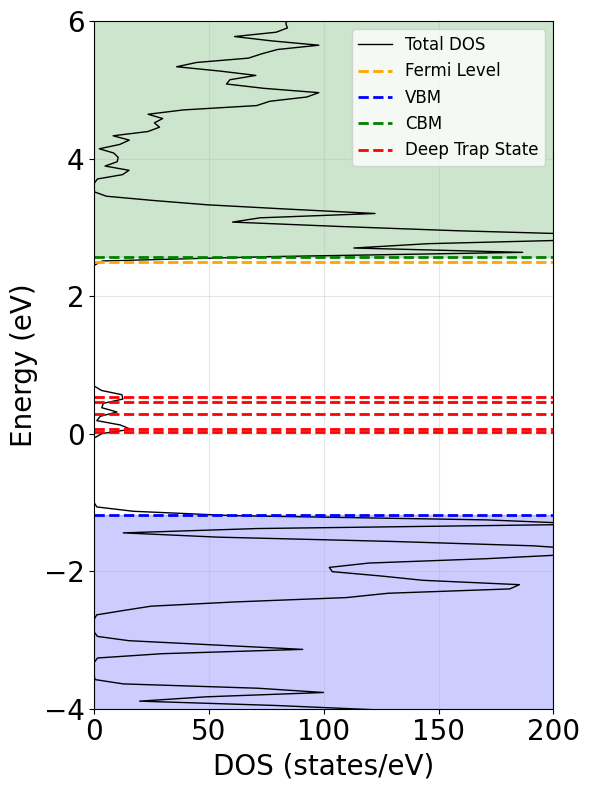

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def read_doscar(filename):
    """
    Read DOSCAR file and extract energy, total DOS, and partial DOS (if available).
    """
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Skip the header (first 6 lines)
    header = lines[:6]
    num_atoms = int(header[0].split()[0])
    e_fermi = float(header[5].split()[3])  # Fermi energy

    # Extract grid data
    nedos = int(header[5].split()[2])  # Number of DOS points
    dos_data = np.array([list(map(float, line.split())) for line in lines[6:6+nedos]])

    energy = dos_data[:, 0]  # Energy values
    total_dos_up = dos_data[:, 1]  # Total DOS (spin-up)
    total_dos_down = dos_data[:, 2] if dos_data.shape[1] > 2 else np.zeros_like(total_dos_up)  # Total DOS (spin-down)

    return energy, total_dos_up, total_dos_down, e_fermi

def plot_energy_band_diagram(energy, total_dos_up, total_dos_down, e_fermi, vbm, cbm, deep_trap, shallow_trap):
    """
    Plot Energy Band Diagram with DOS on x-axis and energy on y-axis.
    """
    # total_dos = total_dos_up + total_dos_down  # Combine spin-up and spin-down DOS
    # total_dos = total_dos_up
    total_dos = total_dos_down
    
    plt.figure(figsize=(6, 8))

    # 전체 영역에서 VBM 이하(파란색) 및 CBM 이상(녹색) 색칠
    plt.axhspan(min(energy), vbm, color='blue', alpha=0.2)  
    plt.axhspan(cbm, max(energy), color='green', alpha=0.2)

    # Plot DOS vs Energy (energy on y-axis)
    plt.plot(total_dos, energy, color='black', linewidth=1.0, label='Total DOS')

    # Highlight Fermi level
    plt.axhline(e_fermi, color='orange', linestyle='--', linewidth=2, label='Fermi Level')

    # Mark VBM and CBM
    plt.axhline(vbm, color='blue', linestyle='--', linewidth=2, label='VBM')
    plt.axhline(cbm, color='green', linestyle='--', linewidth=2, label='CBM')

    # Mark trap levels
    for dt in deep_trap:
        plt.axhline(dt, color='red', linestyle='--', linewidth=2, label='Deep Trap State' if dt == deep_trap[0] else "")
    # for st in shallow_trap:
    #     plt.axhline(st, color='red', linestyle='--', linewidth=2, label='Shallow Trap State' if st == shallow_trap[0] else "")

    # Labels and limits
    plt.ylabel('Energy (eV)', fontsize=20)
    plt.xlabel('DOS (states/eV)', fontsize=20)
    plt.ylim(-4, 6)
    plt.xlim(0, 200)  # Adjust x-axis limit dynamically
    plt.tick_params(axis='x', labelsize=20)  # X축 숫자 크기
    plt.tick_params(axis='y', labelsize=20)  # Y축 숫자 크기

    plt.legend(fontsize=12, loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
filename = "./remove_Br/DOS_calc_magmom/DOSCAR"  # Path to your DOSCAR file

# Read data from the DOSCAR file
energy, total_dos_up, total_dos_down, e_fermi = read_doscar(filename)

# Define VBM and CBM manually
# vbm = -0.1303  # remove_Br_upspin
# cbm = 2.7090  # remove_Br_upspin
vbm = -1.1897  # remove_Br_downpin
cbm = 2.5709  # remove_Br_downspin
deep_trap = [0.0307, 0.0732, 0.2855, 0.4639, 0.5359]
shallow_trap = [2.4608]

# Plot the Energy Band Diagram with filled valence and conduction bands
plot_energy_band_diagram(energy, total_dos_up, total_dos_down, e_fermi, vbm, cbm, deep_trap, shallow_trap)


<Figure size 200x800 with 0 Axes>

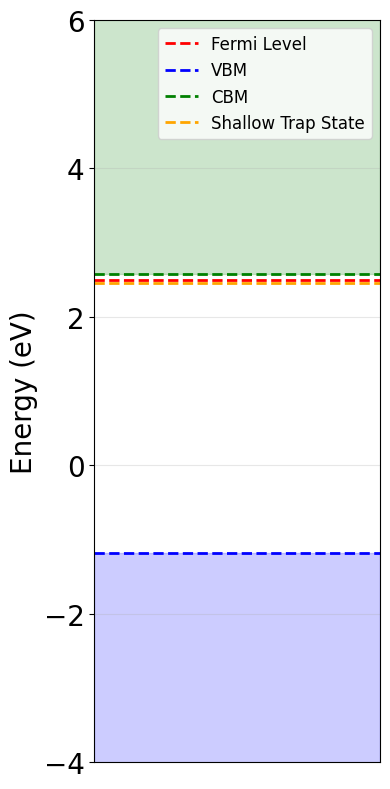

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def read_doscar(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    header = lines[:6]
    e_fermi = float(header[5].split()[3])
    nedos = int(header[5].split()[2])
    dos_data = np.array([list(map(float, line.split())) for line in lines[6:6+nedos]])
    energy = dos_data[:, 0]  # Energy values
    return energy, e_fermi

def plot_energy_band_diagram(energy, e_fermi, vbm, cbm, deep_trap):
    plt.figure(figsize=(2, 8))  # 세로 길이를 강조
    

    plt.figure(figsize=(4, 8))

    # VBM 이하(파란색) 및 CBM 이상(녹색) 영역 색칠
    plt.axhspan(min(energy), vbm, color='blue', alpha=0.2)
    plt.axhspan(cbm, max(energy), color='green', alpha=0.2)

    # Fermi level, VBM, CBM 및 Deep Trap Level 강조
    plt.axhline(e_fermi, color='red', linestyle='--', linewidth=2, label='Fermi Level')
    plt.axhline(vbm, color='blue', linestyle='--', linewidth=2, label='VBM')
    plt.axhline(cbm, color='green', linestyle='--', linewidth=2, label='CBM')
    # for dt in deep_trap:
    #     plt.axhline(dt, color='orange', linestyle='--', linewidth=2, label='Deep Trap' if dt == deep_trap[0] else "")
    for st in shallow_trap:
        plt.axhline(st, color='orange', linestyle='--', linewidth=2, label='Shallow Trap State' if st == shallow_trap[0] else "")

    # Y축 설정
    plt.ylabel('Energy (eV)', fontsize=20)
    plt.ylim(-4, 6)
    plt.yticks(fontsize=20)

    # X축 숨기기
    plt.xticks([])

    plt.legend(fontsize=12, loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
filename = "./remove_Br/DOS_calc_magmom/DOSCAR"
energy, e_fermi = read_doscar(filename)

# Define VBM, CBM, and trap states
vbm = -1.1897  # remove_Br_downspin
cbm = 2.5709  # remove_Br_downspin
deep_trap = [0.0307, 0.0732, 0.2855, 0.4639, 0.5359]
shallow_trap = [2.4608]

# Plot the Energy Band Diagram
plot_energy_band_diagram(energy, e_fermi, vbm, cbm, deep_trap)


<Figure size 200x800 with 0 Axes>

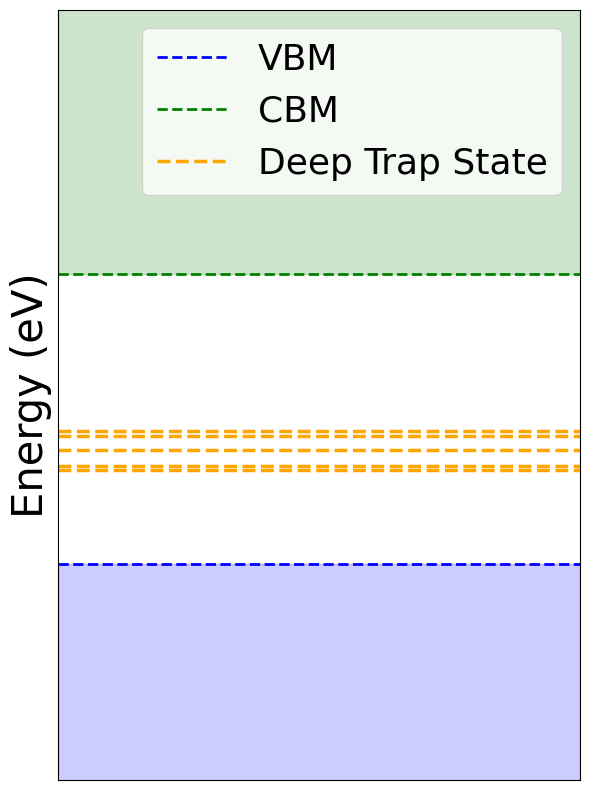

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def read_doscar(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    header = lines[:6]
    e_fermi = float(header[5].split()[3])
    nedos = int(header[5].split()[2])
    dos_data = np.array([list(map(float, line.split())) for line in lines[6:6+nedos]])
    energy = dos_data[:, 0]  # Energy values
    return energy, e_fermi

def plot_energy_band_diagram(energy, e_fermi, vbm, cbm, deep_trap):
    plt.figure(figsize=(2, 8))  # 세로 길이를 강조
    
    plt.figure(figsize=(6, 8))
    # plt.title("Deep Trap States", fontsize=20)

    # VBM 이하(파란색) 및 CBM 이상(녹색) 영역 색칠
    plt.axhspan(min(energy), vbm, color='blue', alpha=0.2)
    plt.axhspan(cbm, max(energy), color='green', alpha=0.2)

    # Fermi level, VBM, CBM 및 Deep Trap Level 강조
    # plt.axhline(e_fermi, color='red', linestyle='--', linewidth=2, label='Fermi Level')
    plt.axhline(vbm, color='blue', linestyle='--', linewidth=2, label='VBM')
    plt.axhline(cbm, color='green', linestyle='--', linewidth=2, label='CBM')
    for dt in deep_trap:
        plt.axhline(dt, color='orange', linestyle='--', linewidth=2.5, label='Deep Trap State' if dt == deep_trap[0] else "")
    # for st in shallow_trap:
    #     plt.axhline(st, color='orange', linestyle='--', linewidth=2.5, label='Shallow Trap State' if st == shallow_trap[0] else "")

    # Y축 설정
    plt.ylabel('Energy (eV)', fontsize=30)
    plt.ylim(-4, 6)
    plt.yticks([])

    # X축 숨기기
    plt.xticks([])

    plt.legend(fontsize=26, loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
filename = "./remove_Br/DOS_calc_magmom/DOSCAR"
energy, e_fermi = read_doscar(filename)

# Define VBM, CBM, and trap states
# vbm = -0.1303  # remove_Br_upspin
# cbm = 2.7090  # remove_Br_upspin
vbm = -1.1897  # remove_Br_downpin
cbm = 2.5709  # remove_Br_downspin
deep_trap = [0.0307, 0.0732, 0.2855, 0.4639, 0.5359]
shallow_trap = [2.4608]

# Plot the Energy Band Diagram
plot_energy_band_diagram(energy, e_fermi, vbm, cbm, deep_trap)


## defect formation energy

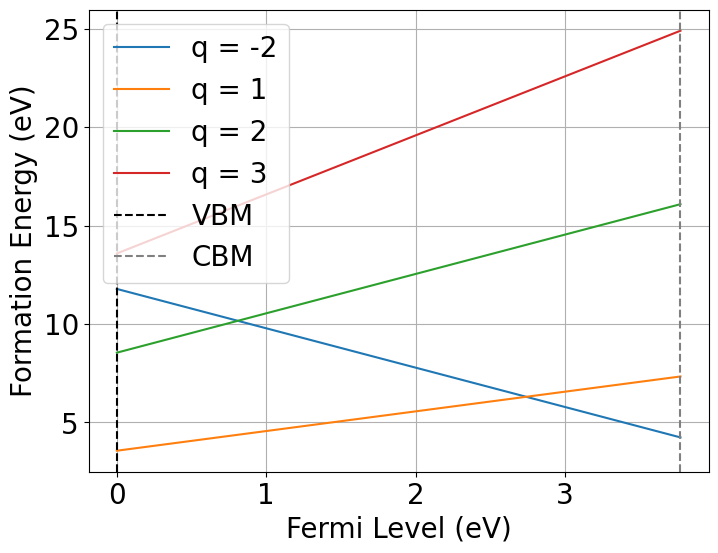

In [24]:
import numpy as np
import matplotlib.pyplot as plt

defect_energies = {
    -2: -3640.1867,  # E(D_q) for charge state -2
    # -1: -3.5,  # E(D_q) for charge state -1
    #  0: -3.0,  # E(D_q) for charge state  0
     1: -3648.4113,  # E(D_q) for charge state  1
     2: -3643.4274,   # E(D_q) for charge state  2
     3: -3638.3843
}

E_bulk = -3653.6032  # Bulk energy E(MAPbX3)
mu_D = -1.6369  # Chemical potential of defect species
E_corr = 0  # Correction term
E_VBM = -1.1974  # Valence Band Maximum (reference point)
E_CBM = 2.5769  # Conduction Band Minimum

E_F_values = np.linspace(0, E_CBM - E_VBM, 100)  # Fermi level range

plt.figure(figsize=(8, 6))

for q, E_Dq in defect_energies.items():
    E_f_values = [E_Dq - E_bulk + mu_D + q * E_F + E_corr for E_F in E_F_values]
    plt.plot(E_F_values, E_f_values, label=f'q = {q}')

plt.axvline(0, color='black', linestyle='--', label='VBM')
plt.axvline(E_CBM-E_VBM, color='gray', linestyle='--', label='CBM')
plt.xlabel("Fermi Level (eV)", fontsize=20)
plt.ylabel("Formation Energy (eV)", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# plt.title("Defect Formation Energy vs. Fermi Level")
plt.legend(fontsize=20)
plt.grid()
plt.show()


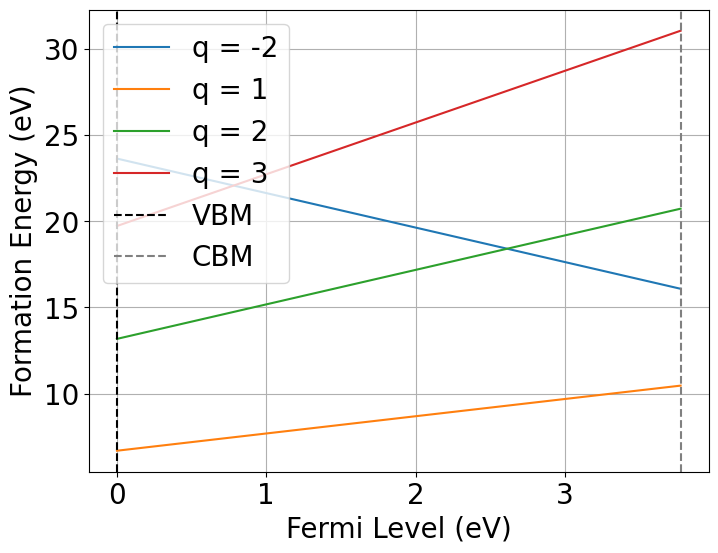

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Defect energies for different charge states
defect_energies = {
    -2: -3640.1867,
     1: -3648.4113,
     2: -3643.4274,
     3: -3638.3843
}

# Bulk energy E(MAPbX3)
E_bulk = -3653.6032  

# Chemical potential for each charge state (example values, modify as needed)
mu_D_values = {
    -2: -10.21547121,
     1: -1.5014819,
     2: -3.0029638,
     3: -4.5044457
}

# Correction term
E_corr = 0  

# Valence Band Maximum (VBM) and Conduction Band Minimum (CBM)
E_VBM = -1.1974  
E_CBM = 2.5769  

# Define Fermi level range
E_F_values = np.linspace(0, E_CBM - E_VBM, 100)

# Plot defect formation energy for each charge state
plt.figure(figsize=(8, 6))

for q, E_Dq in defect_energies.items():
    mu_D = mu_D_values[q]  # Select mu_D for current charge state
    E_f_values = [E_Dq - E_bulk - mu_D + q * E_F + E_corr for E_F in E_F_values]
    plt.plot(E_F_values, E_f_values, label=f'q = {q}')

# Add vertical lines for VBM and CBM
plt.axvline(0, color='black', linestyle='--', label='VBM')
plt.axvline(E_CBM-E_VBM, color='gray', linestyle='--', label='CBM')

# Labels and formatting
plt.xlabel("Fermi Level (eV)", fontsize=20)
plt.ylabel("Formation Energy (eV)", fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()
